In [2]:
import logging

import pandas as pd
import matplotlib.pyplot as plt

from rowing.world_rowing import api, livetracker, utils, dashboard, cli

logging.basicConfig(level=logging.INFO)
logging.getLogger().setLevel(logging.INFO)

# Live tracking

Running the cell below will automatically update the graph with the livetracking data and predictions for the end of the race. 

INFO:world_rowing.api:loaded last race started: Men's Eight Final FA
INFO:world_rowing.dashboard:loading Men's Eight Final FA, starting at 2021-07-30 02:25:00+01:00


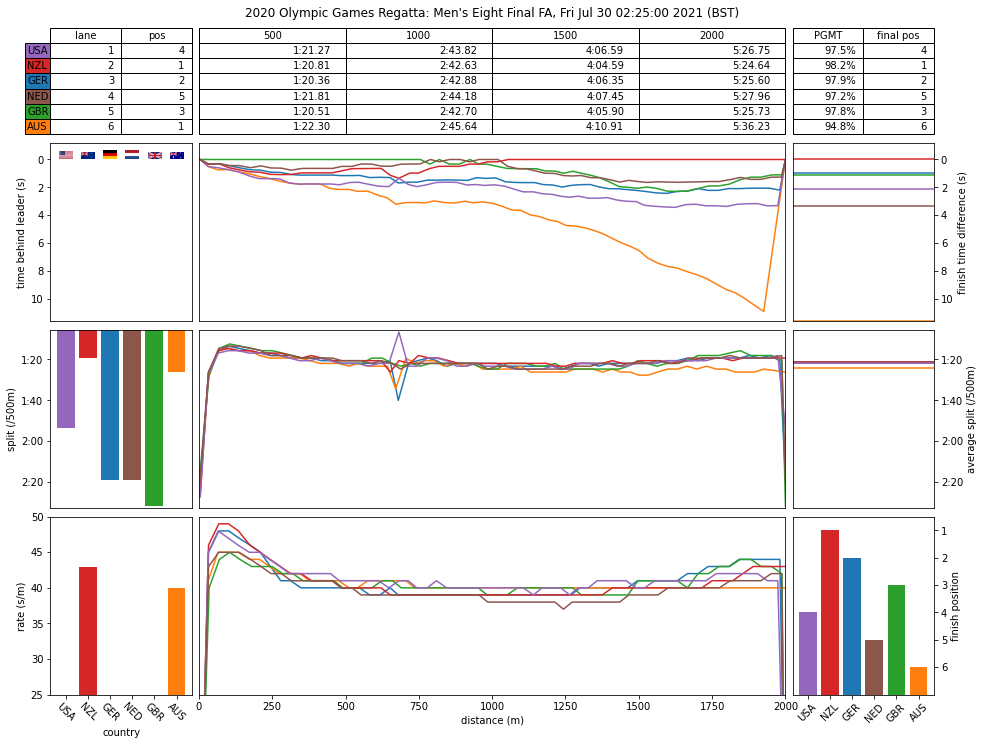

In [3]:
competition = api.get_competitions(2021).loc["e807bba5-6475-4f1a-9434-26704585bf19"]
dash = dashboard.Dashboard.load_last_race(competition=competition, figsize=(14, 10))
dash.update()

# Viewing livetracking data for previous races

You can view the livetracking data for previous races as well

In [4]:
races = api.get_competition_races(competition.name)
races.iloc[:10].DisplayName

id
820c8656-ce52-47ea-ba55-7234b354c7b1             Lightweight Women's Double Sculls Heat 1
bcdd5cae-1772-44da-a9a7-b8bd3786f8e7             Lightweight Women's Double Sculls Heat 2
8b324308-d581-4405-a91f-0db23b535910            Lightweight Women's Double Sculls Heat H3
f73c8215-2427-459f-959d-2dc252a02215        Lightweight Women's Double Sculls Repechage 1
842a3024-7ea3-4156-b5a4-99145e06ef18        Lightweight Women's Double Sculls Repechage 2
8c51cb1f-e33f-45fb-af26-6bfbc86d1605    Lightweight Women's Double Sculls Semifinal A/B 1
982a7e03-cd4a-4ba0-a8f7-6ecb31ff30d5    Lightweight Women's Double Sculls Semifinal A/B 2
6f99d474-34d7-4f6c-ba84-b1bab962472c            Lightweight Women's Double Sculls Final B
169414b8-d18f-4350-930a-bfac0531bddb            Lightweight Women's Double Sculls Final A
af877ca3-960e-49a5-a8fb-b20d70941a8c            Lightweight Women's Double Sculls Final C
Name: DisplayName, dtype: object

INFO:world_rowing.dashboard:loading Lightweight Women's Double Sculls Final A, starting at 2021-07-29 02:10:00+01:00


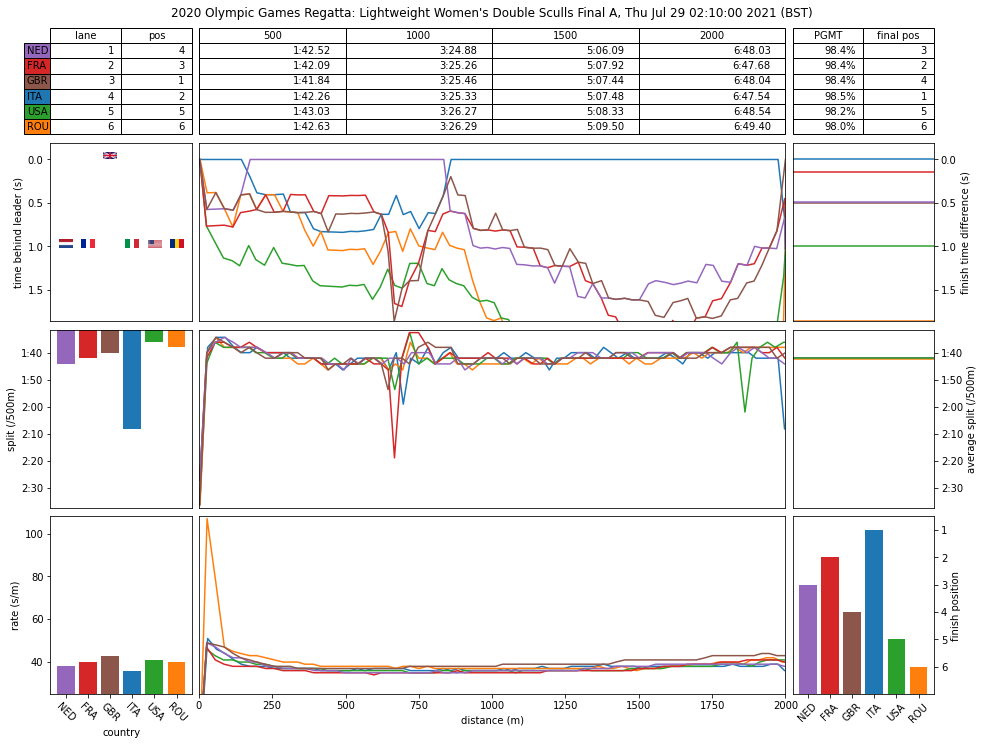

In [5]:
race = races.iloc[8]
dash = dashboard.Dashboard.from_race_id(
    race.name, figsize=(14, 10))
dash.update()

# Viewing competition PGMTs

Unfortunately doesn't work for the Olympics

In [6]:
comp_pgmts = api.get_competition_pgmts(competition.name)
group_boat_pgmts = comp_pgmts.groupby('Boat')
boat_pgmts = group_boat_pgmts\
    .first()\
    .sort_values('PGMT', ascending=False)
boat_pgmts

,PGMT,Time,WBT,Country,Rank,Lane,Date
Boat,,,,,,,
LM2x,1.000000,6:05.33,6:05.33,IRL,1,3,2021-07-28 02:30:00
LW2x,1.000000,6:41.36,6:41.36,ITA,1,4,2021-07-28 02:50:00
M4x,1.000000,5:32.03,5:32.03,NED,1,4,2021-07-28 01:30:00
W2-,1.000000,6:47.41,6:47.41,NZL,1,4,2021-07-28 03:30:00
W4x,1.000000,6:05.13,6:05.13,CHN,1,3,2021-07-28 01:50:00
W8+,1.000000,5:52.99,5:52.99,ROU,1,4,2021-07-28 03:40:00
M2x,0.998307,6:00.33,5:59.72,FRA,1,3,2021-07-28 00:30:00
W4-,0.997309,6:15.37,6:14.36,AUS,1,3,2021-07-28 00:50:00
W2x,0.990724,6:41.03,6:37.31,ROU,1,4,2021-07-28 00:18:00


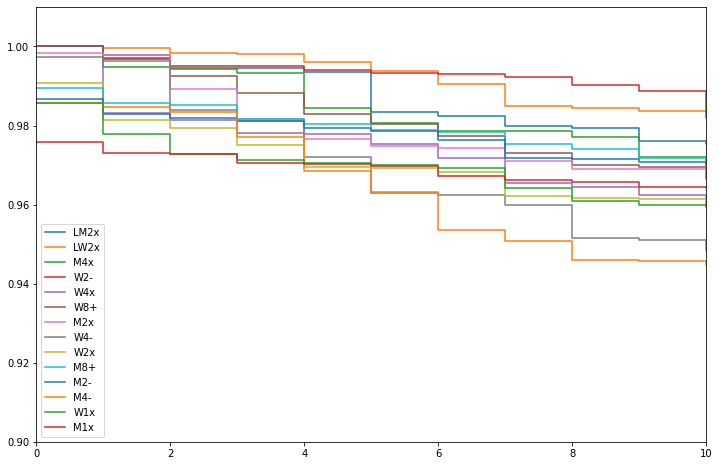

In [7]:
f, ax = plt.subplots(figsize=(12, 8))

for boat in boat_pgmts.index:
    pgmt = group_boat_pgmts.get_group(boat).PGMT.sort_values(ascending=False)
    ax.step(range(pgmt.size), pgmt.values, label=boat, where='post')
    
ax.set_xlim(0, 10)
ax.set_ylim(0.9, comp_pgmts.PGMT.max() + .01)
ax.legend();